# _Module 3 leçon 1_: Anonymisation des données personnelles synthétiques avant la publication

<div class="alert alert-block alert-warning">
    <b>A la fin de la formation, vous pourrez:</b>
    <br>
    <ul>
        <li>Reconnaître les problèmes de respect de la vie privée et de la confidentialité lors du stockage des données et de la sécurité 
            des données personnelles.</li>
        <li>Reconnaître les responsabilités et les mécanismes de sécurisation des données stockées (data-at-rest) ou en transit 
            (date-in-motion).</li>
        <li>Utiliser des méthodes d'anonymisation des données, y compris le floutage géospatiale, la suppression des adresses et des noms, 
            et l'obscurcissement des champs.</li>
        <li>Étudier et appliquer des techniques d'agrégation appropriées pour anonymiser les données personnelles qui ne peuvent pas être 
            enlevées des fichiers.</li>
    </ul>
</div>

---

## 1.1 L'éthique et les risques de la désanonymisation des données à caractère personnel

Lorsque nous publions des données, nous assumons une grande responsabilité. Non seulement les gens utiliseront ces données pour mener des recherches, construire des applications commerciales ou même prendre des décisions qui changeront leur vie, comme par exemple où vivre, travailler ou étudier, mais certaines personnes - des adversaires - essaieront d'utiliser ces données pour faire du mal.

<div class="alert alert-block alert-danger">
    <p><b>L'anonymisation des données</b> est l'ensemble des techniques qui agissent pour modifier de manière irréversible les données 
        personnelles par le biais du cryptage, de la rédaction ou l'agrégation, de sorte qu'une personne concernée ne peut plus être 
        identifiée directement ou indirectement à partir d'un ensemble de données. Pour soutenir l'intégrité des de recherche et 
        d'analyse, l'anonymisation doit préserver la sémantique des données originales pour garantir la résolution des entités - les 
        relations internes entre les données - est encore réalisable.
    <p><b>La complexité de la gestion de ces risques ne peut être sous-estimée.</b> Cette leçon ne peut être qu'un aperçu de la 
        les techniques et les compétences requises. Veuillez suivre les conseils de professionnels et reconnaître que ce cours n'est qu'un 
        aperçu.</p>
</div>

### Les métadonnées et la politique révolutionnaire américaine de 1772

Nous avons passé une grande partie de ce cours à apprendre comment produire et présenter des métadonnées, c'est-à-dire des informations sur l'information. Les données, aussi mal structurées soient-elles, peuvent être comprises avec des métadonnées appropriées. Les données, aussi bien structurées soient-elles, ne peuvent être comprises sans elles.

Les métadonnées sont essentielles pour comprendre la signification des données et, en soi, elles sont très suggestives.

À titre d'exemple, prenons [Paul Revere](https://en.wikipedia.org/wiki/Paul_Revere), le héros révolutionnaire américain de leur guerre d'indépendance contre les Britanniques. Cette guerre, qui s'est déroulée [de 1775 à 1783](https://en.wikipedia.org/wiki/American_Revolutionary_War), a opposé les colons à l'Empire britannique.

Kieran Healy, professeur de sociologie à l'université de Duke, a imaginé ce qui se passerait si les espions et agents secrets britanniques de l'époque avaient accès aux outils [d'analyse des réseaux sociaux](https://en.wikipedia.org/wiki/Social_network_analysis) d'aujourd'hui. Dans ["Using Metadata to find Paul Revere"](https://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/), il démontre comment les métadonnées seules peuvent révéler la centralité et l'importance de Paul Revere dans les efforts révolutionnaires du soulèvement naissant.

En 1772, les Britanniques luttaient pour faire face à la rébellion et à un soulèvement populaire naissant. Les chefs de diverses cellules indépendantistes ont été arrêtés, mais ils n'avaient aucune idée de la façon dont ces rébellions étaient organisées. En utilisant [des données indiquant simplement à quelle organisation appartiennent les différentes personnes](https://github.com/kjhealy/revere) - sans rien savoir de ces personnes ou de leurs croyances - Healy part d'un tableau (dont voici un extrait) :

                               StAndrewsLodge LoyalNine NorthCaucus LongRoomClub TeaParty Bostoncommittee LondonEnemies 
    Adams.John                      0         0           1            1        0               0             0
    Adams.Samuel                    0         0           1            1        0               1             1
    Allen.Dr                        0         0           1            0        0               0             0
    Appleton.Nathaniel              0         0           1            0        0               1             0
    Ash.Gilbert                     1         0           0            0        0               0             0
    Austin.Benjamin                 0         0           0            0        0               0             1
    Austin.Samuel                   0         0           0            0        0               0             1
    Avery.John                      0         1           0            0        0               0             1
    Baldwin.Cyrus                   0         0           0            0        0               0             1
    Ballard.John                    0         0           1            0        0               0             0

Pour finalement construire un réseau complet d'interactions sociales entre différentes personnes :

![Réseau social révolutionnaire](images/revere-network-reduced.png)

Cela ne signifie peut-être pas grand chose pour vous, mais vous pouvez voir différents groupes, ou organisations, de personnes liées par des individus qui s'étendent sur ces groupes. Un de ces liens est présenté ici :

![Paul Revere](images/revere-closeup.png)

Un gouvernement qui arrête diverses personnes au centre de chacun des grands groupes peut vouloir découvrir ce qui peut unir ces groupes disparates. Y a-t-il des organisateurs cachés ? Une telle carte du réseau - qui n'offre aucune autre information que "qui connait qui" - est incroyablement puissante.

Les analystes britanniques ne connaissaient pas ces techniques, aussi simples soient-elles, en 1772, et le reste appartient à l'histoire.

### Évaluer le risque lié à la publication des données

L'analyse des réseaux et des statistiques est au cœur de toutes les recherches, de l'épidémiologie aux soins de santé, en passant par l'éducation, les sciences de l'environnement, la physique et l'ingénierie. Elle est également au cœur des moteurs de recommandation publicitaire utilisés en ligne.

Certaines de ces utilisations sont profondément bénéfiques - comme l'identification de symptômes indiquant spécifiquement une maladie - et d'autres sont terriblement abusives - identifiant les personnes par leurs croyances religieuses ou leurs caractéristiques personnelles.

La Commission de protection des données personnelles de Singapour [décrire les risques de divulgation suivants](https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF-Files/Other-Guides/Guide-to-Anonymisation_v1-(250118).pdf) :

- __Divulgation de l'identité (ré-identification)__ : permettre l'identité d'un individu décrit par un dossier spécifique. Cela peut se 
  produire de scénarios tels que l'anonymisation insuffisante, la réidentification par lien ou l'inversion de pseudonymes.
- __Divulgation d'un attribut__ : déterminer qu'un attribut décrit dans l'ensemble de données appartient à une personne spécifique, même 
  si le on ne peut pas distinguer le parcours de l'individu.
- __Divulgation des inférences__ : faire une inférence sur un individu même s'il ne fait pas partie de l'ensemble de données, par les 
  propriétés statistiques de l'ensemble des données.
  
Un exemple typique d'un tel risque est la publication des antécédents médicaux. Par exemple, un ensemble de données contenant les dossiers anonymisés d'un chirurgien révèle que tous ses patients de moins de 30 ans ont subi une procédure particulière. Si l'on sait qu'une personne donnée a 28 ans et qu'elle est cliente de ce chirurgien, on sait alors que cette personne a subi l'intervention en question, même si le dossier de cette personne ne peut être distingué des autres dans l'ensemble de données anonymisées.

Le risque ne provient pas seulement d'un ensemble de données, mais de la manière dont plusieurs ensembles de données peuvent être recombinés.

### Risques liés aux données au repos et aux données en mouvement

Les données ne sont pas toujours utilisées. Il peut s'agir de données de recherche dans des feuilles de calcul sur des supports de stockage inutilisés, ou des données échangées par courrier électronique entre personnes, ou encore des données utilisées sur l'ordinateur de quelqu'un. Ces différents moments constituent chacun un type différent de risque de divulgation accidentelle ou d'exposition par inadvertance.

- __Données au repos__ : données inactives stockées numériquement ou physiquement dans n'importe quel format, que ce soit sur papier dans 
  des fichiers, ou dans des bases de données ou des tableurs sur les disques durs, les téléphones ou d'autres formes de stockage.
- __Données en mouvement__ : données actives soit en transit entre les utilisateurs, soit utilisées dans des applications.

Les données sont menacées non seulement par des personnes qui pourraient les dérober (les adversaires, terme utilisé en cryptographie) mais aussi par les destructions accidentelles (incendies, inondations, effacement, etc.). Si vous collaborez pour assurer l'anonymat d'un ensemble de données, vous devez protéger ces données contre toute divulgation accidentelle en les envoyant par courrier électronique à des collègues se trouvant dans différents états de traitement. Le courrier électronique est intrinsèquement peu sûr.

Le processus de sécurisation de la protection des données ne concerne pas seulement le résultat final, mais aussi toutes les étapes intermédiaires. Les données doivent être sécurisées non seulement dans leur état final, mais aussi lors de leur utilisation, de leur transit et de leur stockage.

Vous pouvez prendre toutes les précautions du monde avant la publication, puis laisser vos données source sur une clé USB dans un bus ou exposer des informations sensibles lorsque vous travaillez sur votre ordinateur portable dans un lieu public.

Comme nous nous efforçons de protéger les données concernées, nous devons toujours nous assurer que nous ne les détériorons pas.

---

## 1.2 Méthodes d'anonymisation des données : rédaction

Il existe un large éventail de techniques pour anonymiser des données. Elles se répartissent toutefois en deux grandes catégories :

- __Réaction__ : technique dans laquelle nous supprimons des champs ou des informations dans des lignes de données tout en conservant une intégrité suffisante pour permettre une analyse sémantique ;
- __l'Agrégation__ : nous agrégeons délibérément les données pour garantir l'anonymat des données aberrantes ;

Pour cette leçon, nous utiliserons un seul ensemble de données, produit par [Synthea](https://github.com/synthetichealth/synthea), un projet open-source qui permet la création de données synthétiques. Ces données sont produites au moyen d'algorithmes de hasard afin de générer des pseudo-informations utiles pour tester les systèmes d'analyse et d'anonymisation :

> Jason Walonoski, Mark Kramer, Joseph Nichols, Andre Quina, Chris Moesel, Dylan Hall, Carlton Duffett, Kudakwashe Dube, Thomas Gallagher, Scott McLachlan, Synthea : An approach, method, and software mechanism for generating synthetic patients and the synthetic electronic health care record, Journal of the American Medical Informatics Association, Volume 25, Issue 3, March 2018, Pages 230-238, https://doi.org/10.1093/jamia/ocx079

Comme nous allons également procéder à de l'anonymisation géospatiale, vous devrez installer un nouveau paquet Python, [`geopandas`](https://geopandas.org/index.html) :

    pip install geopandas
    
Une fois que vous avez fait cela, chargeons l'ensemble des données de la leçon et inspectons-le :

In [1]:
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt

df = pd.read_csv("data/lesson-programmatic/patient-data-anonymisation-exercise.csv")
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


__Ce sont des données synthétiques__. Rien ici n'est réel, mais imaginez que ça l'est. Ces données révèlent non seulement le nom de chaque patient et ses antécédents médicaux, mais aussi son adresse, son permis de conduire, ses numéros de passeport, sa race et la latitude et la longitude de son adresse.

Toute personne menant une recherche clinique a besoin de ces données, mais pas de toutes. Quelle quantité de ces données peut être expurgée sans compromettre leur valeur pour la recherche ?

Si nous supprimions tous les noms et adresses, nous pourrions certainement protéger les individus, mais au détriment de la compréhension de la progression de la maladie.

Prenons l'histoire du patient de _Carmelia Konopelski_ :

In [2]:
df[df["PATIENT_ID"] == "71ba0469-f0cc-4177-ac70-ea07cb01c8b8"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
703,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-15T20:46:46Z,2002-01-15T21:01:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
704,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-25T20:46:46Z,2002-01-25T21:37:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
705,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-11-28T20:46:46Z,2002-12-12T20:46:46Z,ambulatory,Encounter for symptom,129.16,54.16,Perennial allergic rhinitis with seasonal vari...,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
706,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-04-29T20:46:46Z,2003-04-29T21:01:46Z,wellness,Well child visit (procedure),129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
707,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-05-11T20:46:46Z,2003-05-11T21:01:46Z,ambulatory,Encounter for symptom,129.16,54.16,Streptococcal sore throat (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-08T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
784,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:07:46Z,inpatient,Screening surveillance (regime/therapy),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
785,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:16:46Z,inpatient,Gynecology service (qualifier value),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
786,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-08-14T20:46:46Z,2012-08-14T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724


Ces données décrivent dix années de sa vie, de sa naissance en 2002 à sa mort par cancer en 2012. L'évolution de sa maladie est essentielle pour la recherche, mais ses données personnelles ne le sont pas.

### 1.2.1 Stratégie de rédaction

Avant de commencer à faire quoi que ce soit, nous devons comprendre notre ensemble de données, et savoir comment nous avons l'intention de le censurer _ tout en maintenant son intégrité interne afin de pouvoir continuer à effectuer des analyses_.

Imaginons que ces données contiennent des informations sur tous les patients d'une région donnée, mais que les enfants vivant à proximité d'une usine spécifique courent un risque accru de mourir d'un cancer infantile, nous voudrions certainement savoir où vivent ces enfants.

- Veillez à ce que les données individuelles des patients ne puissent être récupérées ;
- Veiller à ce que les caractéristiques géospatiales associées à la morbidité et à la mortalité des patients soient conservées ;
- Prendre en compte le risque d'anonymat des données aberrantes;
- Tester les méthodes de désanonymisation pour s'assurer que les données anonymisées ne peuvent être reconstituées.

Cela signifie que nous pouvons supprimer des données comme les noms, mais nous avons besoin d'une méthode pour relier les données associées à chaque patient. Nous pouvons supprimer des adresses, mais nous avons besoin d'une méthode pour garantir le maintien d'une relation géographique. 

Notez, encore une fois, qu'il ne s'agit que d'une vue d'ensemble et que nous ne pouvons donc aborder ces sujets qu'à la légère.

#### 1.2.2 Méthodes de rédaction

#### Suppression d'attributs

Un `attribut`est également connu sous le nom de `field`. Cette méthode exige que nous supprimions un champ entier. C'est l'une des premières mesures que nous pouvons prendre, et la plus facile.

- Supprimer les données dont nous n'avons pas besoin
- Supprimer les données que nous ne pouvons pas facilement éliminer

Il s'agit d'une mesure destructrice puisque la suppression supprime les données originales.

#### Suppression des enregistrements

Certaines données sont aberrantes, suffisamment rares pour que - en soi - ces données ne puissent pas être anonymisées. Avec la suppression des enregistrements, nous supprimons toutes les données relatives à ces personnes. Cependant, soyez prudent.

Les données aberrantes peuvent présenter un intérêt significatif si leur statut fait partie de l'étude. Si la maladie d'une personne est inhabituelle pour la région où elle vit, pour son ethnicité, son sexe ou son orientation sexuelle, alors cela en ferait une valeur aberrante. Toutefois, cela serait également important pour comprendre la maladie.

D'autre part, si leur lieu de résidence, leur origine ethnique, leur sexe ou leur orientation sexuelle n'ont aucun rapport avec la maladie, alors ils pourraient être éliminés en toute sécurité.

Comment pouvons-nous savoir de quoi il s'agit ?

La méthode d'analyse des valeurs aberrantes est appelée [k-anonymat](https://en.wikipedia.org/wiki/K-anonymity) et dépasse le cadre de ce cours. Cependant, il existe une série de techniques (énumérées dans les "Références") qui permettent d'analyser les données pour évaluer la présence de valeurs aberrantes et le risque de désanonymisation.

#### Pseudonymisation

La pseudonymisation est le remplacement des données d'identification par des valeurs aléatoires. Elle peut être réversible, si vous créez une clé entre les données et les valeurs générées, mais irréversible si vous jetez délibérément les clés. Les pseudonymes persistants permettent de relier un même individu à travers différents ensembles de données.

- `strings`: pseudonymisation par remplacement ;

Notre jeu de données contient déjà un champ pseudonyme, `PATIENT_ID`, mais le problème est qu'il s'agit d'un enregistrement réversible. Il relie absolument les informations confidentielles des patients à ces enregistrements. Nous pouvons générer des clés véritablement anonymes pour supprimer davantage les données.

#### Généralisation

La généralisation est une réduction délibérée de la précision des données, telle que la conversion de l'âge d'une personne en une fourchette, ou d'un lieu précis en un lieu moins précis.

- `range`: conversion de nombres précis en quantiles ou en plages statistiques ;
- `cluster` : agrégation de données géospatiales en clusters statistiquement moins significatifs - ceci peut également être utilisé pour masquer les valeurs aberrantes ;

Concevoir les plages de données avec des tailles appropriées. Parfois, les quantiles sont les plus appropriés, parfois nous utilisons des définitions statistiques (telles que des plages géospatiales conçues pour inclure un nombre suffisant de personnes afin de réduire la désanonymisation).

#### Brassage

Le brassage consiste à réorganiser les données de manière à ce que les valeurs des attributs individuels soient toujours représentées dans l'ensemble de données, mais ne correspondent généralement pas aux enregistrements originaux. Cette méthode ne convient pas à toutes les données. L'échange de maladies entre différents patients rendra certainement les données anonymes, mais confondra également toute analyse épidémiologique.

#### Perturbation des données

La perturbation consiste à ajouter un bruit aléatoire aux données pour les "brouiller". Il peut s'agir d'arrondir, de décaler les dates ou d'ajouter un déplacement géospatial  aux données de type coordonnées.  Cela signifie qu'il faut déplacer artificiellement la précision dans une petite fourchette pour masquer les détails exacts de la personne.

- `dates` : décalage des dates exactes par jours ou par mois ;
- `rounding` : arrondir au décile ou au nombre entier le plus proche, en fonction de la précision des données ;
- `coordinates`: perturber les données par un déplacement géospatial (gigue) ;

Il faut veiller à ne pas ajouter trop ou trop peu de perturbations.

---

### 1.2.3 Processus de rédaction

Chacune de ces étapes nous permet de continuer à maintenir la relation au sein du dossier, et à l'endroit où ces patients ont enregistré l'évolution de leur maladie, tout en veillant à ce que la confidentialité du patient soit préservée.

Voici la liste de tous les `fields` des données. Commencez à réfléchir à ceux qui sont candidats pour chaque méthode :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

Utilisons aussi `geopandas` et regardons l'emplacement physique de nos données :

In [4]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

Quelques explications :

- `"EPSG:4326"` est le système de coordonnées utilisé pour tracer la latitude et les longitudes. Les cartes présentent tout un monde de douleurs liées à la 
  système de coordonnées spécifiques utilisé pour la présentation des données. Cela dépasse le cadre de ce cours.
- `geometry=` est la création d'un `Point` de référence dans la plaine de coordonnées que nous allons tracer.

Malheureusement, pour tracer ces données, vous devrez reprojeter ces coordonnées sur la projection Mercator du web (`EPSG:3857`). Ce n'est pas difficile, mais c'est lent. L'étape suivante peut prendre un certain temps sur votre ordinateur :

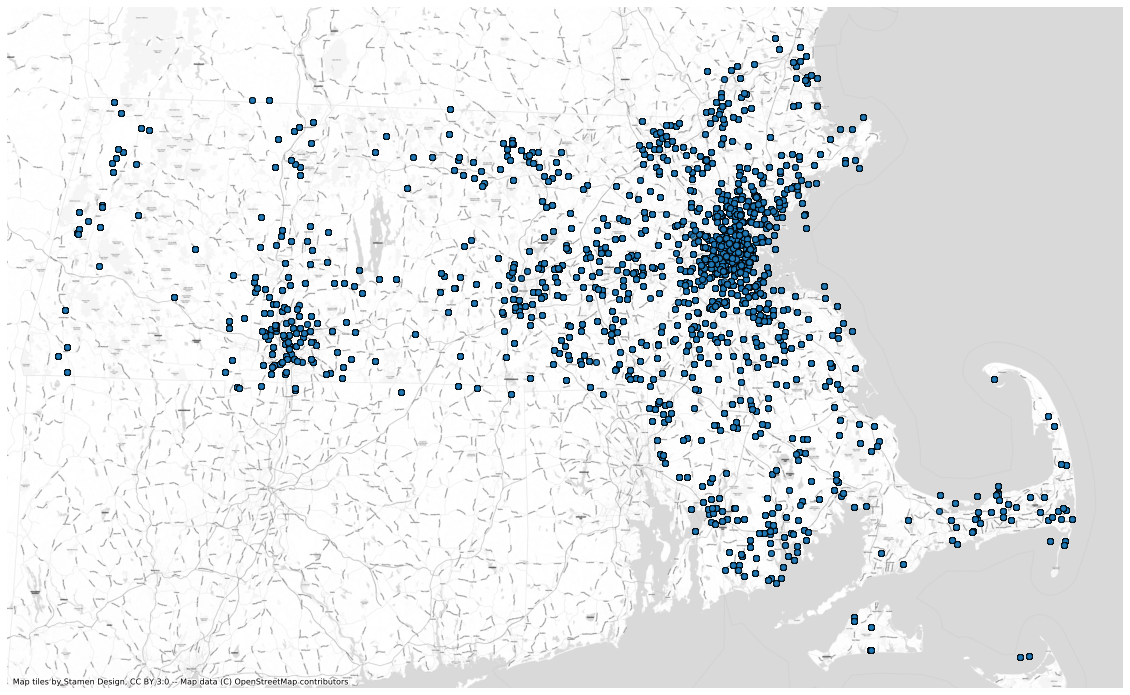

In [5]:
import contextily as ctx

# reproject
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

Commençons à rédiger et à examiner les données énumérées. Ces champs sont des candidats évidents à la `suppression` :

    SSN, DRIVERS, PASSPORT, FIRST, LAST, MAIDEN, ADDRESS, ZIP

In [6]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
df.drop(suppression, axis=1, inplace=True)

Il se trouve que c'est le Massachusetts aux États-Unis, et vous pouvez voir comment notre grappe de données.

Nous allons écrire une `class` Python à exécuter pendant que nous anonymisons nos données. Mais tout d'abord, une démonstration de deux techniques.

- `UUID` : génère un code d'identité unique et aléatoire ;

In [7]:
import uuid

str(uuid.uuid4())

'7ebeaa7d-3565-416e-aa60-15711c99df31'

- `Distributions gaussiennes`: sélection aléatoire à partir d'une [distribution normale (gaussienne)](http://en.wikipedia.org/wiki/Normal_distribution)

In [8]:
import numpy as np

sigma = 0.001 # l'écart-type, c'est-à-dire le degré de variation par rapport aux données originales que nous autorisons
mu = 1 # les données originales, considérées comme la "moyenne"

np.random.normal(mu, sigma)

1.0000884793223845

Ces deux mécanismes nous permettront de créer une version pseudonymisée de nos données :

In [9]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        Pour chaque identité unique produire un UUID unique, et un gaussien randomisé "LAT" et "LON".

        Parameters
        ----------
        identities: liste des chaînes de caractères

        Returns
        -------
        dict
            Chaque entrée de dict contient un enregistrement contenant un "uuid" et un modificateur pour "lat" et "lon".
        """
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        """
        Pour une ligne donnée dans un dataframe, retournez la version pseudonymisée de "PATIENT_ID", "LAT", "LON".
        
        Parameters:
        row : Ligne de la trame de données
        
        row:
        DataFrame tranche de ligne 
        """
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

Lançons cette même visualisation de `geopandas`:

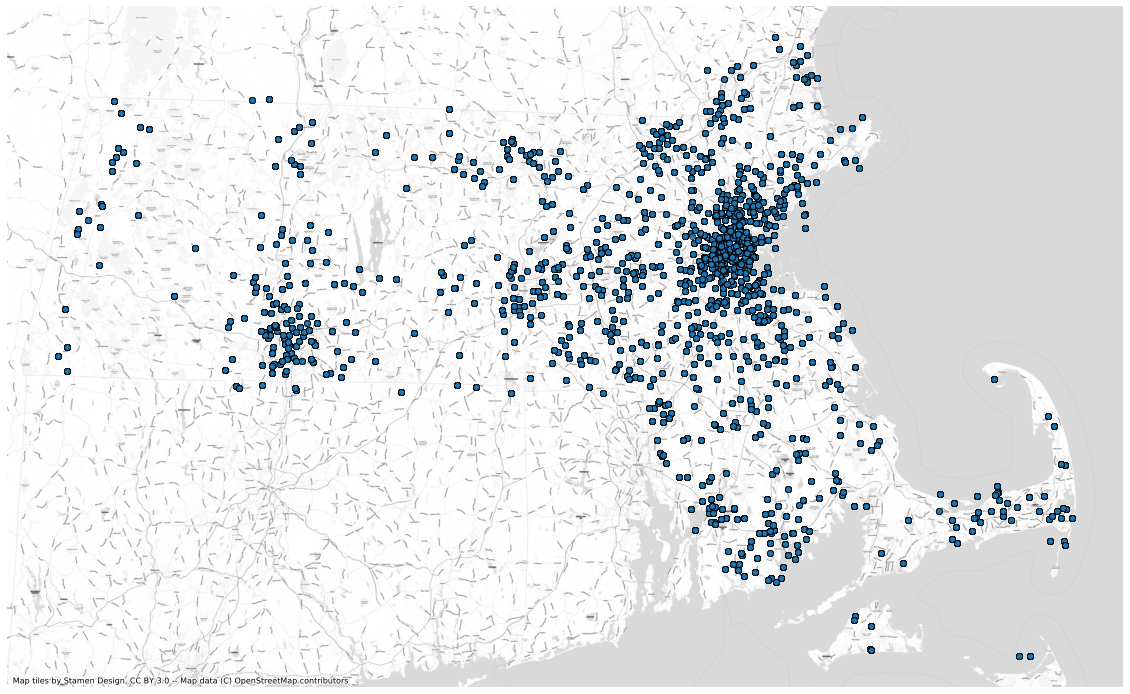

In [10]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

Vous pouvez voir que les données se ressemblent plus ou moins. Si vous craignez que cela ne soit pas suffisamment obscurci, vous pouvez diminuer la valeur du "signe" pour augmenter l'échelle de la modification de coordonnées.

Je vous laisse l'anonymat de la `BIRTHDATE`et de la `DEATHDATE` comme un exercice. Vous pouvez choisir entre la `generalisation` ou la `perturbation` pour la rédaction.

## 1.3 Méthodes d'anonymisation des données : agrégation

Latanya Sweeney, directrice du Data Privacy Lab de l'Institute of Quantitative Social Science (IQSS) à Harvard, a prouvé que [87% de la population américaine peut être réidentifiée en utilisant le code postal, le sexe et la date de naissance](https://dataprivacylab.org/projects/identifiability/paper1.pdf). Nos techniques de rédaction standard n'ont peut-être pas réduit le risque pour les participants à notre étude autant que nous l'espérions.

L'agrégation est bien plus destructrice que la rédaction. Nous perdrons la résolution sur la morphologie des patients et nous perdrons les relations directes entre les données en échange de résumés de ces données. Mais nous gagnerons en sécurité pour les personnes concernées.

### 1.3.1 La confidentialité Différentielle et évaluation des mesures de risque

Le problème de l'agrégation est qu'il existe peu de méthodes généralisées qui peuvent vous guider sur la manière d'en créer une. Chacune est spécifique aux données considérées et à l'éventail des questions de recherche que vous souhaitez couvrir. Il existe des mécanismes pour tester l'anonymat, mais pas pour définir la stratégie.

[La Confidentialité Différentielle](https://fr.wikipedia.org/wiki/Confidentialit%C3%A9_diff%C3%A9rentielle) est un sujet avancé, et est un système permettant de partager publiquement des informations sur un ensemble de données en décrivant les modèles de groupes au sein de l'ensemble de données tout en retenant les informations sur les individus de l'ensemble de données.

Un exemple simple est celui où nous interrogeons notre base de données pour demander le dossier d'un patient spécifique, puis nous demandons le sexe de cette personne selon la procédure suivante :

- Lancez une pièce de monnaie.
- Si la personne a la tête, tirez à nouveau à pile ou face (en ignorant le résultat), et répondez à la question honnêtement.
- S'il s'agit d'une question de pile ou face, relancez la pièce et répondez "Homme" s'il s'agit d'une question de face, "Femme" s'il s'agit d'une question de pile ou face.

Le lancer supplémentaire apparemment redondant dans le premier cas est nécessaire dans les situations où le simple fait de lancer une pièce de monnaie peut être observé par d'autres personnes, même si le résultat réel reste caché. La confidentialité découle alors de la réfutabilité des réponses individuelles.

Cette approche peut garantir la confidentialité individuelle simplement parce que la personne qui effectue la requête ne peut jamais être certaine d'avoir reçu une réponse correcte ou non. Statistiquement, cependant, le résultat global serait le même que dans les données originales.

Le K-anonymat (et les approches similaires comme la L-diversité et la T-proximité) ne sont pas des techniques d'agrégation, mais des mesures utilisées pour vérifier si un seuil de risque a été dépassé.

### 1.3.2 Stratégie d'agrégation

Là où la rédaction est guidée presque exclusivement par les données, l'agrégation est guidée par les objectifs de recherche sur les données. Toute forme d'agrégation limitera ce qui peut être fait et il est essentiel de prendre conscience de ces limites.

Les données de recensement sont généralement agrégées de cette manière, les microdonnées individuelles (réponses de chaque ménage) étant uniquement mises à la disposition des chercheurs accrédités, tandis que les versions agrégées sont mises à la disposition du public.

Notre objectif sera de créer des groupes de données et de procéder ensuite à des agrégations sur chaque groupe. L'éventail des agrégats que nous pouvons former comprend

- `count` : comptage des membres individuels du groupe ;
- `totals` : sommes des valeurs et sommes des sous-groupes à l'intérieur des valeurs (par exemple, durée totale de la maladie et durée de chaque type de maladie) ;
- `averages` : y compris la `mean`, la `median`  et le `mode` des séquences de données ;
- `distributions` : y compris les`quantiles`, les `normals` ou d'autres types de distribution.

Les groupes peuvent être constitués par des "catégories" spécifiques ou des plages "géospatiales".

À bien des égards, un cours complet de statistiques est nécessaire pour bien effectuer les agrégations.

<div class="alert alert-block alert-warning">
    <p><b>Les agrégations nécessitent une certaine familiarité et expérience avec les données à agréger. </b> Il est très difficile de se contenter d'un ensemble de données aléatoires et de savoir comment les agréger
        d'une manière qui favorise l'analyse et en extrait le sens. Il est peu probable que vous soyez responsable de l'agrégation de données dont vous n'avez pas l'expérience, et lorsque vous avez
        l'expérience, savoir comment l'agréger deviendra plus clair.</p>
</div>

#### 1.3.3 Processus d'agrégation

Compte tenu de tout cela, ce qui suit est un exemple d'agrégation travaillée très basique utilisant `pandas`. L'agrégation nécessite un but, ce but est défini par _une question de recherche à laquelle nous devons répondre_.

Créons-en une :

<div class="alert alert-block alert-info">
    <p>Pour les patients décédés, résumez la fourchette d'âge, les maladies spécifiques et le coût total et médian du traitement.</p>
</div>

Nous allons commencer par créer une nouvelle colonne `DEATHAGE` et ensuite obtenir une distribution de ce champ :

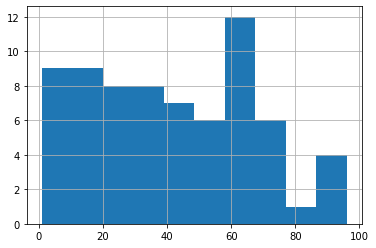

In [53]:
df = dfo.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df[c] = df[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
df = df[df.STOP==df.DEATHDATE]
df.sort_values(by="STOP", inplace=True)
df.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
df["DEATHAGE"] = df.DEATHDATE.apply(lambda x: x.year) - df.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
df["DEATHAGE"].hist(bins=10)

La partie suivante vous sera laissée comme exercice. Votre objectif est de créer un tableau avec les champs suivants :

- Les âges répartis dans les 10 fourchettes ;
- Comptage des raisons spécifiques de la visite à l'hôpital (à partir de la `DESCRIPTION`) pour chaque tranche d'âge, et décider de la manière de présenter cela ;
- Total de tous les coûts de la demande pour chaque tranche d'âge ;
- Médiane de tous les coûts des demandes de remboursement pour chaque tranche d'âge ;

Présenter ceci comme un dataframe.

---

## 1.4 L'anonymisation des données est une compétence spécialisée

Un collecteur de données participera à l'anonymisation des données, mais il est fort probable que cela se fera en collaboration avec des spécialistes et des chercheurs. Des personnes ayant une connaissance intime des données à divulguer et capables d'offrir un guide sur le risque de réidentification.

Ceci marque la fin de ce court cours sur la préparation de données et j'espère que c'est le début de la prochaine étape de votre carrière dans l'analyse et la science des données. Bonne chance et amusez-vous bien.

---

## 1.5 Tutoriel de la leçon

<div class="alert alert-block alert-success">
    <p><b>Tutoriel:</b></p>
    <p>Terminer le traitement du fichier sur lequel nous avons travaillé dans cette leçon.</p>
    <ul>
        <li><b>Redaction</b> : Utiliser soit la <code>généralisation</code> ou la <code>perturbation</code> pour la rédaction des champs 
            <code>START</code>, <code>STOP</code>, <code>BIRTHDATE</code> et <code>DEATHDATE</code> .</li>
        <li><b>Agrégation</b> : Résumer les données dans un nouveau tableau avec les exigences suivantes:</li>
        <ul>
            <li><b>Age</b> : agrégés par chacun des déciles;</li>
            <li><b>Compte</b> : pour chaque tranche d'âge, les raisons spécifiques de la visite à l'hôpital (de <code>DESCRIPTION</code>) et décider de la manière de présenter cela;</li>
            <li><b>Totals</b> : pour chaque tranche d'âge, total de tous les coûts des sinistres;</li>
            <li><b>Médians</b> : pour chaque tranche d'âge, la médiane de tous les coûts des sinistres;</li>
        </ul>
    </ul>
    <p>Présenter ces résultats dans un Jupyter Notebook.</p>
</div>

<div class="alert alert-block alert-info">
     <b>Références:</b>
    <br>
    <ul>
        <li><a href="https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF-Files/Other-Guides/Guide-to-Anonymisation_v1-(250118).pdf">Guide to basic data anonymisation techniques (PDF)</a></li>
        <li><a href="https://gss.civilservice.gov.uk/policy-store/anonymisation-and-data-confidentiality/">Anonymisation and data confidentiality</a></li>
        <li><a href="https://dev.to/r0f1/a-simple-way-to-anonymize-data-with-python-and-pandas-79g">A simple way to anonymize data with Python and Pandas</a></li>
        <li><a href="https://medium.com/district-data-labs/a-practical-guide-to-anonymizing-datasets-with-python-faker-ecf15114c9be">A Practical Guide to Anonymizing Datasets with Python & Faker</a></li>
        <li><a href="https://en.wikipedia.org/wiki/K-anonymity">K-anonymity</a></li>
        <li><a href="https://en.wikipedia.org/wiki/L-diversity">L-diversity</a></li>
        <li><a href="https://en.wikipedia.org/wiki/T-closeness">T-closeness</a></li>
        <li><a href="https://en.wikipedia.org/wiki/Differential_privacy">Differential privacy</a></li>
        <li><a href="https://medium.com/sfu-cspmp/various-approaches-towards-data-privacy-with-python-differential-privacy-and-homomorphic-a748e560d43b">Various Approaches towards Data Privacy with Python: Differential Privacy and Homomorphic Encryption</a></li>
        <li><a href="https://towardsdatascience.com/understanding-differential-privacy-85ce191e198a">Understanding Differential Privacy</a></li>
        <li><a href="https://www.ihsn.org/anonymization">IHSN Microdata anonymization</a></li>
        <li><a href="https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/">Summarising, Aggregating, and Grouping data in Python Pandas</a></li>
        <li><a href="http://www.benjamin-nguyen.fr/papers/ss.pdf">Techniques D'Anonymisation</a></li>
    </ul>
</div>